In [198]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import community
import matplotlib.pyplot as plt
import networkx as nx
import json

In [21]:
df = pd.read_csv('/Users/christophermarker/Documents/DSI7/Data/Capstone/export_griis.csv', sep=';', encoding='latin-1')

In [22]:
df.drop(['Unnamed: 10'], axis=1, inplace=True)

In [23]:
df.shape

(84405, 10)

In [24]:
df.head()

,Species,Authority,Country,Kingdom,Environment/System,Origin,Evidence of Impacts (Y/N),Verification (Y/N),Date,Source
0,Abax parallelepipedus,"(Piller & Mitterpacher, 1783)",Belgium,Animalia,terrestrial,Alien,No,Yes,2017,''RINSE - Reducing the Impact of Non-Native Sp...
1,Abax parallelepipedus,"(Piller & Mitterpacher, 1783)",Canada,Animalia,terrestrial,Alien,No,No,2017,Food and Agricultural Organisation of the Unit...
2,Abbottina rivularis,"(Basilewsky, 1855)",Japan,Animalia,freshwater,Alien,No,No,2017,Invasive Species of Japan (2014). Invasive Spe...
3,Abbottina rivularis,"(Basilewsky, 1855)",Kazakhstan,Animalia,freshwater,Alien,No,No,2017,"Froese, R. and D. Pauly. Editors. (2014). Fish..."
4,Abbottina rivularis,"(Basilewsky, 1855)",Kyrgyzstan,Animalia,freshwater,Alien,No,No,2017,CAB International (2014). CABI Invasive Specie...


In [343]:
df[df['Country'].str.contains('America')]

,Species,Authority,Country,Kingdom,Environment/System,Origin,Evidence of Impacts (Y/N),Verification (Y/N),Date,Source
40,Abelmoschus moschatus,Medik.,American Samoa,Plantae,terrestrial,Alien,No,Yes,2017,"Ragone, D. and D.H. Lorence. (2006). Botanical..."
141,Abrus precatorius,L.,American Samoa,Plantae,terrestrial,Alien,No,Yes,2017,"US Forest Service, Pacific Island Ecosystems a..."
268,Acacia auriculiformis,Benth.,American Samoa,Plantae,terrestrial,Alien,No,Yes,2017,"Space, J. C., Flynn, T. (2000). Observations o..."
556,Acacia mangium,Willd.,American Samoa,Plantae,terrestrial,Alien,Yes,Yes,2017,"Hanson, D. E. (2004). ASSIST: Development of t..."
830,Acalypha indica,L.,American Samoa,Plantae,terrestrial,Alien,No,Yes,2017,"US Forest Service, Pacific Island Ecosystems a..."
841,Acalypha lanceolata,Willd.,American Samoa,Plantae,terrestrial,Alien,No,Yes,2017,"US Forest Service, Pacific Island Ecosystems a..."
1357,Achyranthes aspera,L.,American Samoa,Plantae,terrestrial,Alien,No,Yes,2017,"US Forest Service, Pacific Island Ecosystems a..."
1486,Acmella uliginosa,Cass. (Sw.),American Samoa,Plantae,terrestrial,Alien,No,Yes,2017,"US Forest Service, Pacific Island Ecosystems a..."
1583,Acridotheres fuscus,"(Wagler, 1827)",American Samoa,Animalia,terrestrial,Alien,Yes,Yes,2017,"Hanson, D. E. (2004). ASSIST: Development of t..."
1627,Acridotheres tristis,"Linnaeus, 1766",American Samoa,Animalia,terrestrial,Alien,Yes,Yes,2017,"Hanson, D. E. (2004). ASSIST: Development of t..."


In [25]:
df.replace('Adelgespiceae', 'Adelges piceae', inplace=True)

In [26]:
df['Evidence of Impacts (Y/N)'].value_counts()

No     75541
Yes     8864
Name: Evidence of Impacts (Y/N), dtype: int64

In [27]:
lst_all = df.Species.unique().tolist()

In [28]:
lst_2_words = []
lst_1_word = []
lst_3_or_more = []

for i in lst_all:
    if i.count(' ') == 1:
        lst_2_words.append(i)
    if i.count(' ') == 0:
        lst_1_word.append(i)
    if i.count(' ') >= 2:
        lst_3_or_more.append(i)

In [29]:
print(len(lst_2_words))
print(len(lst_1_word))
print(len(lst_3_or_more))

19787
207
1315


# Adjacency Matrix

In [177]:
am = pd.DataFrame(np.zeros(shape=(203,203)), columns=df['Country'].unique(), index=df['Country'].unique())

In [178]:
countries = []
for country in df[df['Origin'].str.contains('Native')]['Country'].unique():
    countries.append(country)
    for species in list(df[(df['Country'] == country) & (df['Origin'] == 'Native/Alien')]['Species']):
        for invaded_country in df[(df['Species'] == species) & (df['Origin'] == 'Alien')]['Country']:
            countries.append(invaded_country)
            am.at[invaded_country,country] += 1
            
            #print('Species {} invaded {} from {}'.format(species, invaded_country, country))

In [179]:
countries = set(countries)

In [181]:
drop = [x for x in df['Country'].unique() if x not in countries]

In [183]:
am.drop(drop, inplace=True) #dropping rows

In [184]:
am.drop(drop, inplace=True, axis=1) # dropping columns

In [283]:
am.shape

(197, 197)

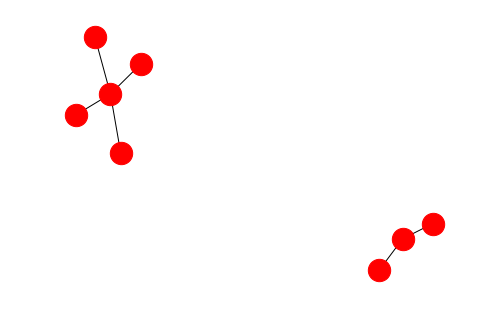

In [362]:
# From stack_overflow

def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 10)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=mylabels, with_labels=False)
    plt.show()

show_graph_with_labels(am.values, test_labels)

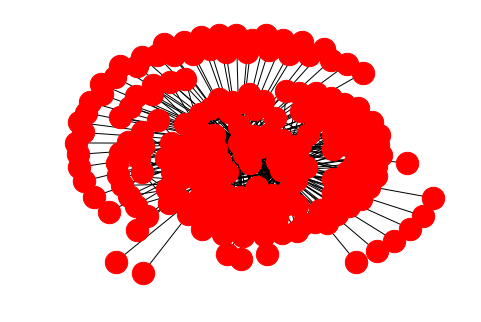

In [345]:
def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix > 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=mylabels, with_labels=False)
    plt.show()

show_graph_with_labels(am.values, test_labels)

In [359]:
def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 70)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

show_graph_with_labels(am.values, test_labels)

KeyError: 112

In [282]:
test_labels

{0: 'Belgium',
 1: 'Canada',
 2: 'Japan',
 3: 'Kazakhstan',
 4: 'Kyrgyzstan',
 5: "Lao People's Democratic Republic",
 6: 'Mongolia',
 7: 'Myanmar',
 8: 'Turkmenistan',
 9: 'Uzbekistan',
 10: 'Armenia',
 11: 'Algeria',
 12: 'Australia',
 13: 'Anguilla',
 14: 'Chad',
 15: 'Costa Rica',
 16: 'Croatia',
 17: 'India',
 18: 'Madagascar',
 19: 'Marshall Islands',
 20: 'Philippines',
 21: 'Seychelles',
 22: 'South Africa',
 23: 'Yemen',
 24: 'Yemen-Soqotra',
 25: 'Zimbabwe',
 26: 'Ecuador',
 27: 'Taiwan',
 28: 'American Samoa',
 29: 'Cook Islands',
 30: 'Fiji',
 31: 'Micronesia (Federated States of)',
 32: 'Niue',
 33: 'Palau',
 34: 'Papua New Guinea',
 35: 'Russian Federation',
 36: 'Samoa',
 37: 'Singapore',
 38: 'Solomon Islands',
 39: 'Tonga',
 40: 'Denmark',
 41: 'Ireland',
 42: 'Portugal',
 43: 'Latvia',
 44: 'Norway',
 45: 'Sweden',
 46: 'United Kingdom of Great Britain and Northern Ireland',
 47: 'France',
 48: 'Lithuania',
 49: 'Czech Republic',
 50: 'Germany',
 51: 'Iceland',
 52: '

In [285]:
am['Portugal']

Belgium                                      53.0
Canada                                       41.0
Japan                                        41.0
Kazakhstan                                    2.0
Kyrgyzstan                                    2.0
Lao People's Democratic Republic              3.0
Mongolia                                      3.0
Myanmar                                       1.0
Turkmenistan                                  2.0
Uzbekistan                                    2.0
Armenia                                       4.0
Algeria                                       7.0
Australia                                    66.0
Anguilla                                      3.0
Chad                                          2.0
Costa Rica                                   13.0
Croatia                                      15.0
India                                        32.0
Madagascar                                    6.0
Marshall Islands                              4.0


In [238]:
test_labels = dict({(i,am.index[i]) for i in range(am.shape[0])})

test_labels.items()

dict_items([(112, 'Nigeria'), (29, 'Cook Islands'), (81, 'Kiribati'), (114, 'Sri Lanka'), (87, 'Austria'), (155, 'Gambia (the)'), (130, 'Tunisia'), (127, 'Mali'), (132, 'Uruguay'), (75, 'Mozambique'), (105, 'Comoros'), (84, 'Switzerland'), (154, 'Botswana'), (40, 'Denmark'), (11, 'Algeria'), (9, 'Uzbekistan'), (20, 'Philippines'), (48, 'Lithuania'), (95, 'Netherlands'), (59, 'Barbados'), (43, 'Latvia'), (92, 'Democratic Repubic of Korea'), (120, 'Uganda'), (90, 'Bulgaria'), (185, 'Indonesia'), (26, 'Ecuador'), (115, 'Thailand'), (100, 'Benin'), (151, 'Chile- Juan Fernandez Islands'), (44, 'Norway'), (162, 'Guinea-Bissau'), (168, 'Montenegro'), (42, 'Portugal'), (78, 'Ethiopia'), (86, 'Albania'), (137, 'Greece'), (19, 'Marshall Islands'), (22, 'South Africa'), (142, 'Maldives'), (24, 'Yemen-Soqotra'), (178, 'Saint Kitts and Nevis'), (160, 'Equatorial Guinea'), (62, 'Jamaica'), (128, 'Mauritania'), (79, 'Aruba'), (161, 'Panama'), (94, 'Morocco'), (129, 'Niger'), (140, 'Iraq'), (32, 'Niue

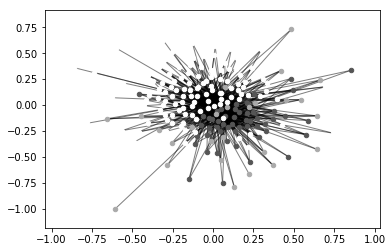

In [291]:
A=numpy.matrix(am)
G=nx.from_numpy_matrix(A)

partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=.5)
plt.show()

# Modularity Score for Community Analysis

In [364]:
modularity = community.modularity(partition, G)
print('Your modularity score is', modularity)

Your modularity score is 0.19424436706274217


In [214]:
modularity

0.19424436706274217

# Further Community Analysis

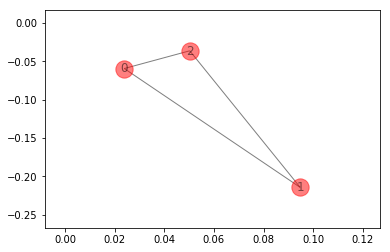

In [295]:
IG = community.induced_graph(partition, G, weight='weight')

nx.draw_networkx(IG, pos, alpha=.5)
plt.show()

In [313]:
 cd = community.generate_dendrogram(G)

In [326]:
am.index.values

array(['Belgium', 'Canada', 'Japan', 'Kazakhstan', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Mongolia', 'Myanmar',
       'Turkmenistan', 'Uzbekistan', 'Armenia', 'Algeria', 'Australia',
       'Anguilla', 'Chad', 'Costa Rica', 'Croatia', 'India', 'Madagascar',
       'Marshall Islands', 'Philippines', 'Seychelles', 'South Africa',
       'Yemen', 'Yemen-Soqotra', 'Zimbabwe', 'Ecuador', 'Taiwan',
       'American Samoa', 'Cook Islands', 'Fiji',
       'Micronesia (Federated States of)', 'Niue', 'Palau',
       'Papua New Guinea', 'Russian Federation', 'Samoa', 'Singapore',
       'Solomon Islands', 'Tonga', 'Denmark', 'Ireland', 'Portugal',
       'Latvia', 'Norway', 'Sweden',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Lithuania', 'Czech Republic', 'Germany', 'Iceland', 'China',
       'Spain', 'Mexico', 'Brazil', 'Suriname', 'Antigua and Barbuda',
       'Bahamas', 'Barbados', 'Cuba', 'Honduras', 'Jamaica',
       'Saint Lucia', 'S

In [333]:
list(cd[0].values())

[0,
 0,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 0]

In [335]:
partition_df = pd.DataFrame({'partition':list(cd[0].values()), 'country':am.index.values}, index=cd[0].keys())

In [336]:
partition_df.to_csv('/Users/christophermarker/Documents/DSI7/Data/Capstone/partition.csv')

In [337]:
partition_df

,country,partition
0,Belgium,0
1,Canada,0
2,Japan,0
3,Kazakhstan,1
4,Kyrgyzstan,1
5,Lao People's Democratic Republic,2
6,Mongolia,0
7,Myanmar,2
8,Turkmenistan,1
9,Uzbekistan,1


# Scraping COL

In [121]:
dist = []
for i in lst_2_words:
    w1,w2 = i.split(' ')
    response = requests.get('http://webservice.catalogueoflife.org/col/webservice?name=' + w1 + '+' + w2 + '&format=json&response=full')
    try:
        if response.status_code == 200:
            if response.json()['results'][0]['distribution'] != '':
                dist.append(response.json()['results'][0]['distribution'])
            else:
                dist.append(np.nan)
        else:
            dist.append(np.nan)
    except:
        dist.append(np.nan)
        pass

In [122]:
len(dist)

19787

In [124]:
test1 = pd.DataFrame({'name':lst_2_words, 'dist':dist})

In [127]:
test1.isnull().sum()

dist    6624
name       0
dtype: int64

In [312]:
test1.to_pickle('/Users/christophermarker/Documents/DSI7/Data/Capstone/pickle')

# Testing things with Ben

In [135]:
#________ Ben's scratch pad:

ben = df.drop(['Authority','Source','Date'], axis=1)
ben = ben.sample(frac=.10)

In [138]:
ben2 = ben[['Species','Country']]

In [139]:
ben2.head()

,Species,Country
66318,Raphanus sativus,Ireland
71698,Senna siamea,Brazil
3172,Albizia saman,Haiti
38418,Heterosiphonia japonica,Ireland
21998,Cota tinctoria,United Kingdom of Great Britain and Northern I...


In [140]:
ben2['Species'].nunique()

5151

In [143]:
ben2.groupby('Species').agg(lambda x: ' | '.join(x))

,Country
Species,
Abelmoschus esculentus,Marshall Islands
Abelmoschus manihot,India
Abelmoschus moschatus,Marshall Islands
Abgrallaspis cyanophylli,Denmark
Abies alba,Portugal | Ireland
Abies grandis,France | Czech Republic
Abies lasiocarpa,Norway
Abies nordmanniana,Sweden | Portugal
Abies pinsapo,Armenia | France


In [145]:
df.Origin.value_counts()

Alien                    82578
Cryptogenic/Uncertain     1099
Native/Alien               728
Name: Origin, dtype: int64

In [146]:
df['Country'].nunique()

203

In [154]:
df[df['Origin'].str.contains('Native')]['Country'].unique()

array(['Australia',
       'United Kingdom of Great Britain and Northern Ireland', 'Portugal',
       'Germany', 'Madagascar', 'Turkey', 'Bulgaria', 'Latvia', 'Spain',
       'Philippines', 'Denmark', 'Chile', 'Japan', 'American Samoa',
       'Chile-Rapa Nui - Easter Islands', 'Venezuela'], dtype=object)

In [144]:
df[df['Species'] == 'Acacia dealbata']

,Species,Authority,Country,Kingdom,Environment/System,Origin,Evidence of Impacts (Y/N),Verification (Y/N),Date,Source
381,Acacia dealbata,Link,Algeria,Plantae,terrestrial,Alien,No,Yes,2017,"Zedam, A. (2013). Zedam, A. Pers.comm July 201..."
382,Acacia dealbata,Link,Argentina,Plantae,terrestrial,Alien,Yes,Yes,2017,CAB International (2014). CABI Invasive Specie...
383,Acacia dealbata,Link,Australia,Plantae,terrestrial,Native/Alien,No,Yes,2017,"Randall, R.P. (2007). The Introduced Flora of ..."
384,Acacia dealbata,Link,Burundi,Plantae,terrestrial,Alien,No,Yes,2017,CAB International (2014). CABI Invasive Specie...
385,Acacia dealbata,Link,Chile,Plantae,terrestrial,Alien,Yes,Yes,2017,Inter American Biodiversity Information Networ...
386,Acacia dealbata,Link,Chile-Rapa Nui - Easter Islands,Plantae,terrestrial,Alien,No,Yes,2017,"Meyer, J-Y. (2008). Rapport de mission d'exper..."
387,Acacia dealbata,Link,China,Plantae,terrestrial,Alien,No,No,2017,CAB International (2014). CABI Invasive Specie...
388,Acacia dealbata,Link,Costa Rica,Plantae,terrestrial,Alien,No,No,2017,CAB International (2014). CABI Invasive Specie...
389,Acacia dealbata,Link,Croatia,Plantae,terrestrial,Alien,No,Yes,2017,"Nikoli?, T. (ed.) (2015). Flora Croatica Datab..."
390,Acacia dealbata,Link,France,Plantae,terrestrial,Alien,No,No,2017,DAISIE (Delivering Alien Invasive Species Inve...


In [ ]:
for country in df[df['Origin'].str.contains('Native')]['Country'].unique():
    
    for species in list(df[(df['Country'] == country) & (df['Origin'] == 'Native/Alien')]['Species']):
        
        for invaded_country in df[(df['Species'] == species) & (df['Origin'] == 'Alien')]['Country']:
        
            am.at[invaded_country,country] += 1